In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer
from nltk import word_tokenize
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from collections import Counter
from wordcloud import WordCloud
import string



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chandrikamukherjee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chandrikamukherjee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chandrikamukherjee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/chandrikamukherjee/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Data preprocessing

In [2]:
# remove emoji
def remove_emoji(word):
    emoji_pattern = re.compile("["
           u"\U0001F600-\U0001F64F"  # emoticons
           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
           u"\U0001F680-\U0001F6FF"  # transport & map symbols
           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
           u"\U00002702-\U000027B0"
           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', word)

In [3]:
# remove hyperlink
def remove_hyperlinks(text):
    temp = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.',text)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('&gt;', "", temp) # greater than sign
    temp = re.sub('&#x27;', "'", temp) # apostrophe
    temp = re.sub('&#x2F;', ' ', temp)
    temp = re.sub('<p>', ' ', temp) # paragraph tag
    temp = re.sub('<i>', ' ', temp) #italics tag
    temp = re.sub('</i>', '', temp) 
    temp = re.sub('&#62;', '', temp)
    temp = re.sub("\n", '', temp) # newline 
    return temp

In [4]:
# cleaning and stop word removal
def clean_tweet(tweet):
    temp=tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("chatgpt","",temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    punc=string.punctuation
    temp=temp.translate(str.maketrans('','',punc))
    
    #removing stopwords
    new_list=[]
    words=word_tokenize(temp)
    sws=stopwords.words('english')
    for word in words:
        if word not in sws:
            new_list.append(word)
    
    temp=' '.join(new_list)
    return temp

In [5]:
def spell_correct(data):
    data['final_tweet'].apply(lambda x: str(TextBlob(x).correct()))
# spell_correct(data1)


In [6]:
def lemmatize(text):    
    new_list=[]
    lemma=WordNetLemmatizer()
    words=word_tokenize(text)
    for word in words:
        new_list.append(lemma.lemmatize(word))
    
    return ' '.join(new_list)

# second data set analysis

In [7]:
data2 = pd.read_csv('huggingface_data.csv')

In [8]:
data2.isnull().sum()

Date                   6
Tweet                  6
Url                   31
User                  31
UserCreated           31
UserVerified          31
UserFollowers         31
UserFriends           31
Retweets              31
Likes                 31
Location           76420
UserDescription    14777
dtype: int64

In [9]:
data2.head()

Date  \
0  2023-02-24 07:59:26+00:00   
1  2023-02-24 07:59:23+00:00   
2  2023-02-24 07:59:17+00:00   
3  2023-02-24 07:58:54+00:00   
4  2023-02-24 07:58:45+00:00   

                                               Tweet  \
0  How to hire 100x more productive team members ...   
1  Chatgtp breakfast about to start #ChatGPT #fut...   
2  @PiCoreTeam Pi network will be one of the supe...   
3  Build your first $100K/Year Start-up in just 2...   
4  Disappointed with @Samsung. My TV stopped work...   

                                                 Url           User  \
0  https://twitter.com/smnishad/status/1629028212...       smnishad   
1  https://twitter.com/SevenKingsSch/status/16290...  SevenKingsSch   
2  https://twitter.com/jad_alrabe3/status/1629028...    jad_alrabe3   
3  https://twitter.com/yournotionguy/status/16290...  yournotionguy   
4  https://twitter.com/sbmza/status/1629028042340...          sbmza   

                 UserCreated UserVerified  UserFollowers  UserFriends  \
0  2009-03-04 15:50:52+00:00        False         2524.0       4966.0   
1  2010-05-06 09:05:00+00:00        False         1322.0        174.0   
2  2012-03-05 03:41:41+00:00        False          311.0       1822.0   
3  2023-02-09 13:22:56+00:00        False           43.0         10.0   
4  2009-11-28 06:45:15+00:00        False          175.0       1644.0   

  Retweets Likes           Location  \
0      0.0   0.0   New Delhi, India   
1      0.0   0.0  Ilford, Redbridge   
2      0.0   0.0     Irbid, jordan    
3      0.0   0.0                NaN   
4      0.0   0.0                NaN   

                                     UserDescription  
0          Account Planning at Adfactors Advertising  
1  All Through. Outstanding. World Class. See Six...  
2  أنا وقلبي وعَقلٌ لم يَسَع حُلُمي\nيا ربُّ هيِّ...  
3  🤓 Productivity nerd\n🗒️ Daily Notion tips & tr...  
4                                   Vires in Numeris

In [10]:
stop_words = stopwords.words('english')

In [11]:
data2['Tweet'] = data2['Tweet'].astype(str)

In [12]:
data2['count_stop_words'] =  data2['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
data2['hashtag_count'] = data2['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data2['word_count'] = data2['Tweet'].apply(lambda x : len(str(x).split(" ")))
data2['final_tweet'] = data2['Tweet']
data2['final_tweet'] = data2['final_tweet'].apply(remove_emoji)
data2['final_tweet'] = data2['final_tweet'].apply(remove_hyperlinks)
data2['final_tweet'] = data2['final_tweet'].apply(clean_tweet)
data2['final_tweet'] = data2['final_tweet'].apply(lemmatize)

In [13]:
text = " ".join(tweet for tweet in data2['final_tweet'])

print(len(text))

28868099


In [14]:
data2[['Tweet', 'final_tweet']]

Tweet  \
0       How to hire 100x more productive team members ...   
1       Chatgtp breakfast about to start #ChatGPT #fut...   
2       @PiCoreTeam Pi network will be one of the supe...   
3       Build your first $100K/Year Start-up in just 2...   
4       Disappointed with @Samsung. My TV stopped work...   
...                                                   ...   
305427  @OpenAI 's new #ChatGPT is insane\nPrompt: An ...   
305428  ChatGPT first look - https://t.co/16K2NlmOoY. ...   
305429  OK so @OpenAI's new #ChatGPT can basically jus...   
305430  Just in! \n#ChatGPT - research early stage GPT...   
305431  #ai Models are set to become the search engine...   

                                              final_tweet  
0       hire 100x productive team member free intervie...  
1       chatgtp breakfast start futureproofing opportu...  
2       pi network one super portal web3 world pinetwo...  
3       build first 100kyear startup 24 hour ai ai art...  
4       disappointed tv stopped working le 2 year frus...  
...                                                   ...  
305427  new insaneprompt article seo optimizing childr...  
305428  first look thing incredible education roleplay...  
305429  ok new basically generate aiart prompt asked o...  
305430  research early stage gpt3 optimised chat remem...  
305431  ai model set become search engine future atm s...  

[305432 rows x 2 columns]

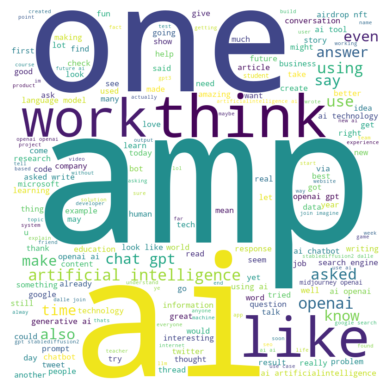

In [15]:
stop_words = stopwords.words('english')

    

wc = WordCloud(stopwords=stop_words,
               height=800,
               width=800,
               background_color = 'white',
               prefer_horizontal=1).generate(text)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show(block=True)

In [16]:
# common words
eda=data2.copy()

eda['temp_list'] = eda['final_tweet'].apply(lambda x:str(x).split())
top = Counter([item for sublist in eda['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(30))
temp.columns = ['Common_words','count']
#bar plot using plotly.express
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [17]:
#tree map using plotly.express
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [18]:
data2.groupby(['Likes']).sum()

UserFollowers  \
Likes                                                               
0.0                                                   342124069.0   
1.0                                                   358258212.0   
2.0                                                   418803870.0   
3.0                                                   294405245.0   
4.0                                                   278910824.0   
...                                                           ...   
982                                                      261799.0   
99                                                       102938.0   
998                                                        2078.0   
Conservation Officer for @WildTroutTrust, Part ...            0.0   
Creator & Host of The Contributors Show\nCo-Fou...            0.0   

                                                    UserFriends  \
Likes                                                             
0.0                                                 117328423.0   
1.0                                                  76428897.0   
2.0                                                  45615132.0   
3.0                                                  29810823.0   
4.0                                                  21274094.0   
...                                                         ...   
982                                                     22016.0   
99                                                      34372.0   
998                                                      3682.0   
Conservation Officer for @WildTroutTrust, Part ...          0.0   
Creator & Host of The Contributors Show\nCo-Fou...          1.0   

                                                    count_stop_words  \
Likes                                                                  
0.0                                                           606747   
1.0                                                           312513   
2.0                                                           150827   
3.0                                                            82880   
4.0                                                            50965   
...                                                              ...   
982                                                                3   
99                                                                43   
998                                                                1   
Conservation Officer for @WildTroutTrust, Part ...                 0   
Creator & Host of The Contributors Show\nCo-Fou...                 0   

                                                    hashtag_count  word_count  
Likes                                                                          
0.0                                                        277542     2056959  
1.0                                                        149583     1059930  
2.0                                                         77275      518729  
3.0                                                         43628      285156  
4.0                                                         27697      176573  
...                                                           ...         ...  
982                                                             1           8  
99                                                              5         136  
998                                                             1           7  
Conservation Officer for @WildTroutTrust, Part ...              0           1  
Creator & Host of The Contributors Show\nCo-Fou...              0           1  

[1076 rows x 5 columns]

In [19]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305432 entries, 0 to 305431
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              305426 non-null  object 
 1   Tweet             305432 non-null  object 
 2   Url               305401 non-null  object 
 3   User              305401 non-null  object 
 4   UserCreated       305401 non-null  object 
 5   UserVerified      305401 non-null  object 
 6   UserFollowers     305401 non-null  float64
 7   UserFriends       305401 non-null  float64
 8   Retweets          305401 non-null  object 
 9   Likes             305401 non-null  object 
 10  Location          229012 non-null  object 
 11  UserDescription   290655 non-null  object 
 12  count_stop_words  305432 non-null  int64  
 13  hashtag_count     305432 non-null  int64  
 14  word_count        305432 non-null  int64  
 15  final_tweet       305432 non-null  object 
dtypes: float64(2), int64

In [20]:
def replace_string_with_zero(value):
    if isinstance(value, str):
        return 0
    else:
        return value

# Apply the custom function to all elements in the DataFrame
data2['Likes'] = data2['Likes'].apply(replace_string_with_zero)
data2['Retweets'] = data2['Retweets'].apply(replace_string_with_zero)

In [21]:
data2.groupby('User').sum()

UserFollowers  UserFriends  Retweets  Likes  count_stop_words  \
User                                                                          
000Dave             11391.0      14760.0       1.0   11.0                45   
000crypto000         1427.0       2185.0       0.0    0.0                 2   
000oooo                27.0        198.0       0.0    0.0                14   
00123_henry            57.0         31.0       0.0    0.0                 3   
0012gaige               3.0         13.0       0.0    0.0                 0   
...                     ...          ...       ...    ...               ...   
zz_zhuoran             19.0        220.0       0.0    0.0                 0   
zzinda22               26.0        782.0       0.0    0.0                 1   
zzinedddine           106.0        365.0      31.0   71.0                 7   
zzsylvester         10815.0       3305.0       0.0    0.0                11   
zzzzzmle              142.0        287.0       0.0    0.0                 1   

              hashtag_count  word_count  
User                                     
000Dave                   4         112  
000crypto000              2           9  
000oooo                   2          42  
00123_henry               7          21  
0012gaige                 2           9  
...                     ...         ...  
zz_zhuoran                1           2  
zzinda22                  3           7  
zzinedddine               2          28  
zzsylvester               1          27  
zzzzzmle                  1           7  

[144306 rows x 7 columns]

In [22]:
data2.groupby('User')['Likes'].sum()


User
000Dave         11.0
000crypto000     0.0
000oooo          0.0
00123_henry      0.0
0012gaige        0.0
                ... 
zz_zhuoran       0.0
zzinda22         0.0
zzinedddine     71.0
zzsylvester      0.0
zzzzzmle         0.0
Name: Likes, Length: 144306, dtype: float64

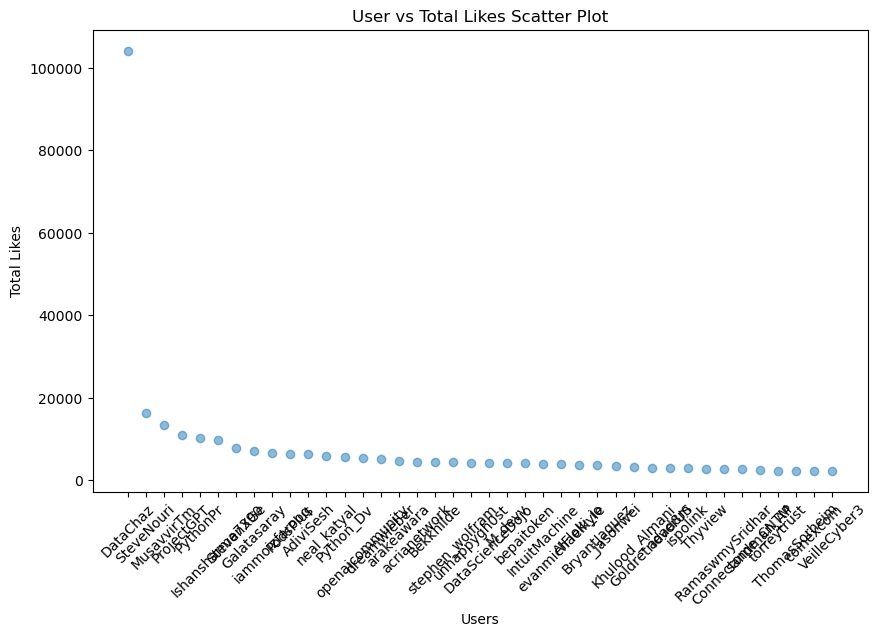

In [23]:
user_likes = data2.groupby('User')['Likes'].sum().reset_index()

user_likes_sorted = user_likes.sort_values(by='Likes', ascending=False).head(40)


# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(user_likes_sorted['User'], user_likes_sorted['Likes'], alpha=0.5)
plt.xlabel('Users')
plt.ylabel('Total Likes')
plt.title('User vs Total Likes Scatter Plot')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Convert the 'DateString' column to a datetime format and add it as a new column 'DateTime'
data2['Date'] = pd.to_datetime(data2['Date'], errors='coerce')

# Filter out rows with invalid datetime values (NaT)
data2 = data2.dropna(subset=['Date'])


In [25]:
data2['Date'] = data2['Date'].dt.date

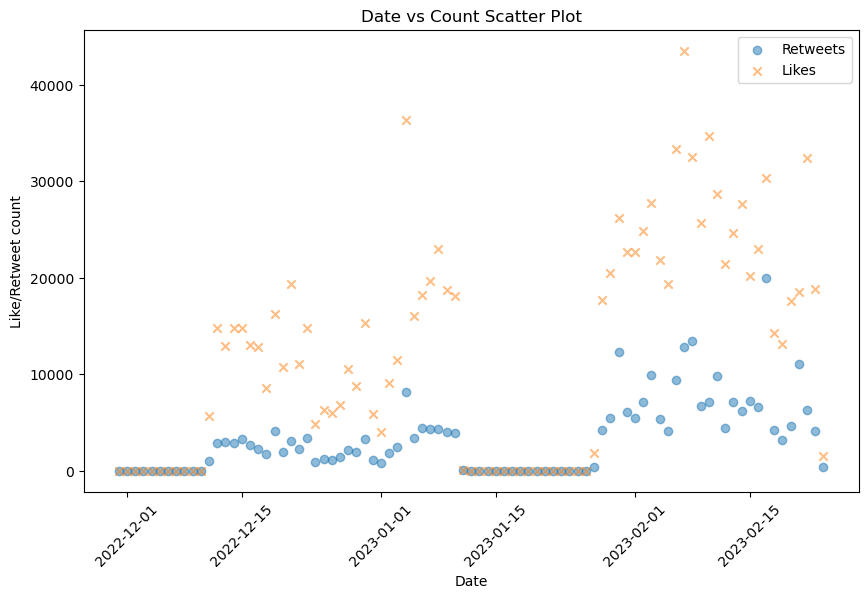

In [26]:
user_likes = data2.groupby('Date')[['Likes','Retweets']].sum().reset_index()

user_likes_sorted = user_likes.sort_values(by=['Likes','Retweets'], ascending=False)


# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(user_likes_sorted['Date'], user_likes_sorted['Retweets'], alpha=0.5, label = 'Retweets', marker='o')
plt.scatter(user_likes_sorted['Date'], user_likes_sorted['Likes'], alpha=0.5, label = 'Likes', marker='x')

plt.xlabel('Date')
plt.ylabel('Like/Retweet count')
plt.title('Date vs Count Scatter Plot')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [27]:
user_likes_sorted

Date    Likes  Retweets
69  2023-02-07  43525.0   12813.0
35  2023-01-04  36305.0    8180.0
72  2023-02-10  34648.0    7131.0
68  2023-02-06  33337.0    9368.0
70  2023-02-08  32492.0   13413.0
..         ...      ...       ...
53  2023-01-22      0.0       0.0
54  2023-01-23      0.0       0.0
55  2023-01-24      0.0       0.0
56  2023-01-25      0.0       0.0
57  2023-01-26      0.0       0.0

[87 rows x 3 columns]

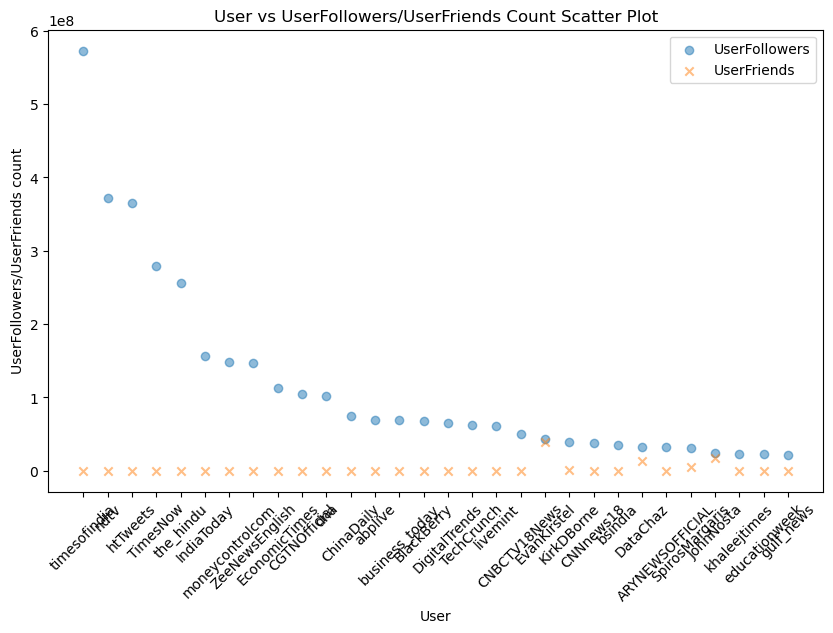

In [28]:
user_popular = data2.groupby('User')[['UserFollowers','UserFriends']].sum().reset_index()

user_popular_sorted = user_popular.sort_values(by=['UserFollowers','UserFriends'], ascending=False).head(30)


# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(user_popular_sorted['User'], user_popular_sorted['UserFollowers'], alpha=0.5, label = 'UserFollowers', marker='o')
plt.scatter(user_popular_sorted['User'], user_popular_sorted['UserFriends'], alpha=0.5, label = 'UserFriends', marker='x')

plt.xlabel('User')
plt.ylabel('UserFollowers/UserFriends count')
plt.title('User vs UserFollowers/UserFriends Count Scatter Plot')
plt.xticks(rotation=45)
plt.legend()
plt.show()

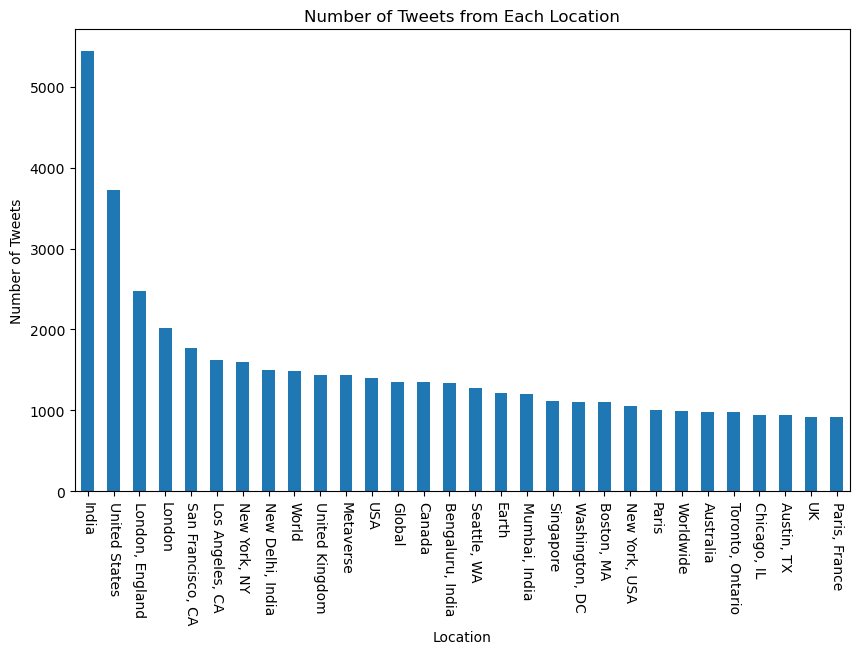

In [29]:
location_counts = data2['Location'].value_counts().head(30)

# Create a bar chart to visualize the user count in each location
location_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets from Each Location')
plt.xticks(rotation=-90)
plt.show()

In [30]:
sid=SentimentIntensityAnalyzer()

In [ ]:
data2['sentiment_compound_polarity']=data2.final_tweet.apply(lambda x:sid.polarity_scores(x)['compound'])
data2['sentiment_neutral']=data2.final_tweet.apply(lambda x:sid.polarity_scores(x)['neu'])
data2['sentiment_negative']=data2.final_tweet.apply(lambda x:sid.polarity_scores(x)['neg'])
data2['sentiment_pos']=data2.final_tweet.apply(lambda x:sid.polarity_scores(x)['pos'])
data2['sentiment_type']=''

data2.loc[data2.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
data2.loc[data2.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
data2.loc[data2.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
data2.head()

In [ ]:
sns.barplot(data=data2,x=data2['sentiment_type'].value_counts().index,y=data2['sentiment_type'].value_counts(),palette='Reds')

In [ ]:
fig = go.Figure(go.Funnelarea(
    text =data2['sentiment_type'].value_counts().index,
    values = data2['sentiment_type'].value_counts(),
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()